# Predicting Insurance Spending Budget

## Introduction

When budgeting for insurance, many fresh graduates, people starting work and even those entering a new phase in their lives, often do not know how much to set aside. There are several benchmarks or the 'rule of thumb' that people can follow. However it does not accurately take into account each individual factor that may affect the prices of premiums.

This analysis aims to identify the most effective machine learning model—and the most informative features—for predicting how much one should set aside for insurance. The data looks at people between the ages of 25 to 36 years old. Our workflow covers environment setup, feature selection, preprocessing, and the training of multiple models. This is the work of the final model selected, which is the XGBoost Regressor model. The goal is to build a robust, accurate predictor of a person's budget.

# Step 1: Import the packages

In this section, we will install and import the required libraries needed for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle

# Step 2a: Load the dataset
In this section, we will walk through the essential steps required to prepare our dataset for modeling. The following sections will pre-process the data, and create the train-test split for machine learning.

In [ ]:
# Ensure the CSV file is in the same directory as this script.
try:
    data = pd.read_csv('../data/person_data.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'person_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

Dataset loaded successfully.


# Step 2b: Make the data more realistic by adding random noise

In this section, to simulate real world variability, we can add noise to our target variable.

In [3]:
# This simulates real-world variability where monthly insurance spending isn't a perfect
# calculation of income. We'll add a small random value to the target variable.
# The `scale` value controls the amount of noise; a smaller value means less noise.
np.random.seed(42) # for reproducibility
noise = np.random.normal(loc=0, scale=10, size=len(data))
data['monthly_insurance_spending'] = data['monthly_insurance_spending'] + noise

print("\nRandom noise added to monthly_insurance_spending to simulate real-world data.")


Random noise added to monthly_insurance_spending to simulate real-world data.


# Step 3: Preprocess the data

In this section, we will walk through the essential steps required to prepare our dataset for modeling. This includes encoding the categorical columns by getting dummies.

In [4]:
# Identify features and the target variable.
# The target is 'monthly_insurance_spending'.
# We will use all other relevant columns as features.
target = 'monthly_insurance_spending'
features = data.drop(columns=[target, 'annual_income']) # Dropping incomes as it can cause collinearity

In [5]:
# Handle categorical variables using one-hot encoding.
# This converts categorical columns like 'gender', 'smoker', and 'marital_status' into numerical format
# that the Random Forest model can understand.
categorical_features = ['gender', 'smoker', 'marital_status', 'own_car', 'elderly_parents', 'any_other_loan']
data_encoded = pd.get_dummies(features, columns=categorical_features)

In [6]:
# Separate features (X) and target (y)
X = data_encoded
y = data[target]
print("\nData preprocessing complete.")
print(f"Features used for training: {list(X.columns)}")


Data preprocessing complete.
Features used for training: ['age', 'monthly_income', 'home_loan_remaining', 'years_left_on_home_loan', 'monthly_expenses', 'kids', 'travel_freq_year', 'savings', 'gender_f', 'gender_m', 'smoker_0', 'smoker_1', 'marital_status_married', 'marital_status_single', 'own_car_0', 'own_car_1', 'elderly_parents_0', 'elderly_parents_1', 'any_other_loan_0', 'any_other_loan_1']


# Step 4: Split the data into training and testing sets

This is where we will split the data into training and testing sets. 

In [7]:
# We'll use 75% of the data for training the model and 25% for testing its performance.
# random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
print("\nData split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data split into training and testing sets.
Training set size: 262 samples
Testing set size: 88 samples


# Step 5: Create and train the XGBoost Regressor model

In this section, we will dive into building and evaluating the ML models. The use of ML models enables computers to learn from the dataset and make predictions by identifying patterns in the dataset.

We will build and evaluate the XGBoost model. We will evaluate the performance of the model by using the R-square and RMSE values. Our baseline model was a RandomForest Regressor which had a R-square of 97.25% and an RMSE of $54.18.

The XGBoost model(eXtreme Gradient Boosting) is a powerful machine learning algorithm that works like a team of decision-making experts. Instead of one expert making all the decisions, it uses a series of simple "experts" (called decision trees) to make predictions.

- **Speed**: It can handle large datasets very quickly
- **Regularization**: It has built-in features to prevent overfitting

In [9]:
# XGBoost is a gradient boosting algorithm that is highly efficient and effective.
print("\nTraining the xgboost model...")
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")


Training the xgboost model...
Model training complete.


# Step 6: Make predictions on the test data

In [10]:
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance

In [11]:
# We'll use several metrics to assess how well the model performed.
# MAE: Average absolute difference between predicted and actual values.
# MSE: Average squared difference (penalizes larger errors more).
# RMSE: Root of the average squared difference
# R^2: Proportion of variance in the target that is predictable from the features.
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nModel Evaluation (Training Set):")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"R-squared (R^2): {train_r2}")



Model Evaluation (Training Set):
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R^2): 0.9999999706088054


In [12]:
# We'll use several metrics to assess how well the model performed.
# MAE: Average absolute difference between predicted and actual values.
# MSE: Average squared difference (penalizes larger errors more).
# RMSE: Root of the average squared difference
# R^2: Proportion of variance in the target that is predictable from the features.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation (Test set):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2}")


Model Evaluation (Test set):
Mean Absolute Error (MAE): 19.24
Mean Squared Error (MSE): 926.53
Root Mean Squared Error (RMSE): 30.44
R-squared (R^2): 0.9913182132102585


# Step 8: Plotting the feature importance

Plotting the feature importance to see which ones impact the prediction the most

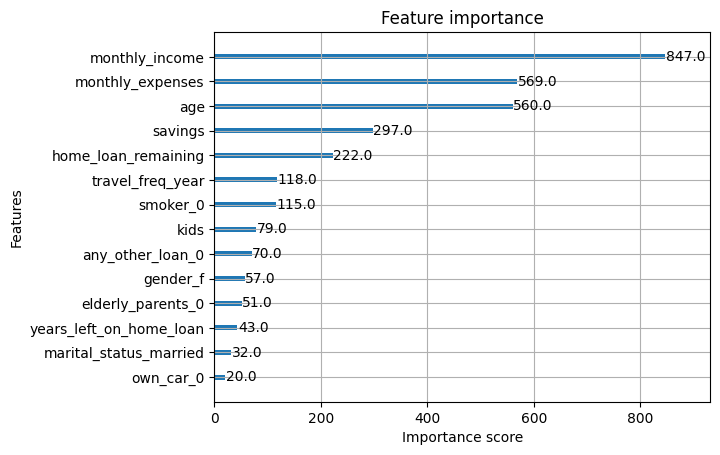

In [13]:
xgb.plot_importance(model, importance_type='weight')
plt.show()

# Step 9: Save the trained model and predictions

Saving the model and predictions for use in a streamlit app

In [14]:
# Save the trained xgboost model to a pickle file
# This file can be loaded later for making new predictions
with open('xgb_regressor_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nXGBoost model saved as 'xgb_regressor_model.pkl'")


XGBoost model saved as 'xgb_regressor_model.pkl'


In [15]:
# Save the predictions to a CSV file
# This creates a DataFrame with the test features and the model's predictions
predictions_df = X_test.copy()
predictions_df['actual_monthly_insurance_spending'] = y_test
predictions_df['predicted_monthly_insurance_spending'] = y_pred

In [16]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('xgb_predictions.csv', index=False)
print("Predictions saved to 'xgb_predictions.csv'")

Predictions saved to 'xgb_predictions.csv'


## 4. Conclusion and Recommendations

We benchmarked multiple machine-learning models and evaluated them on train/test R², RMSE, runtime, and the gap between train and test performance. **XGBoost** emerged as the preferred model. As shown in the summary table, it delivers high train and test R² with low RMSE at a fast runtime, shows no material overfitting, and exceeds our baselines (≥97.25% R² and RMSE < $54.18).

Key price drivers identified across models:
- **Monthly Income**
- **Monthly Expenses**
- **Age**
- **Savings**
- **Home Loan Remaining**
- **Travel Frequency**

While some may think monthly income causes target leakage, it does not. Monthly income is an independent feature. Target leakage happens when a feature in your training data contains information about the target that would not be available at the time of prediction. Monthly income is a pre-existing characteristic of the individual

This workbook pinpoints and quantifies the attributes that most strongly influence insurance spending budget, offering a clear view of it's drivers. Built on a machine-learning model trained on an array of person data, it estimates fair amounts for an insurance budget and highlights the incremental impact of key features.


## Key references include:
* [Scikit-learn](https://scikit-learn.org/)
* [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/)
* [Stack Overflow](https://stackoverflow.com/)